**Name of Student**: V Raghavendra Krishna Srujan<br> 
**PRN**: 200240128033 <br>
**Date of Examination**: 31-12-2020 <br>

# PG-DAI ​ Feb 2020 | Deep Neural Network- Lab Examination
<h2>Question Paper 1</h2>
<h2>Duration: 2 Hours</h2>
<h2>Total Marks: 40</h2>
<div class="alert alert-block alert-warning">    
<h2>Instructions:</h2>
   <ol>
       <li>Read these instructions carefully.</li>
       <li>Do not <strong>REMOVE</strong> any cell.</li>
       <li>There are five questions, all are compulsory.</li>
       <li>Put comments to explain your code.</li>
       <li>If your code fails in compilation, <strong>No marks</strong> will be awarded. Therefore your code shall be free of compilation errors.</li>
       <li>If you delete any cell, your submission may become invalid.</li>
       <li>Your code shall be within the lines marked for the purpose.</li>
       <li>You should be able to attempt all questions if you were regular in class and submission of assignments.</li>
       <li>Do not panic on reading a question if you do not know answer correctly. Attempt the question logically. Explain your steps and you will get up to fifty percent marks.</li>
    </ol>
</div>

Your code shall be between lines marked thus.
>`#### START YOUR CODE`

>`#### END YOUR CODE`

In [1]:
# Import statements
import os

import numpy as np

import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_circles

%matplotlib inline

In [2]:
# Parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 9),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

plt.rcParams.update(params)

# Global Parameters
RANDOM_STATE = 24
NUM_SAMPLES = 5000
NOISE = 0.1
TEST_SIZE = 0.2
EPOCHS = 1000

## Problem Description
This is a classification task based on `sklearn` `make_circle` dataset. It has two features and two classes in the labels. For your convenience, data set is already initialized and split in test and train set and its scatter plot can be seen in the plot below.

(4000, 2) (4000,) (1000, 2) (1000,)


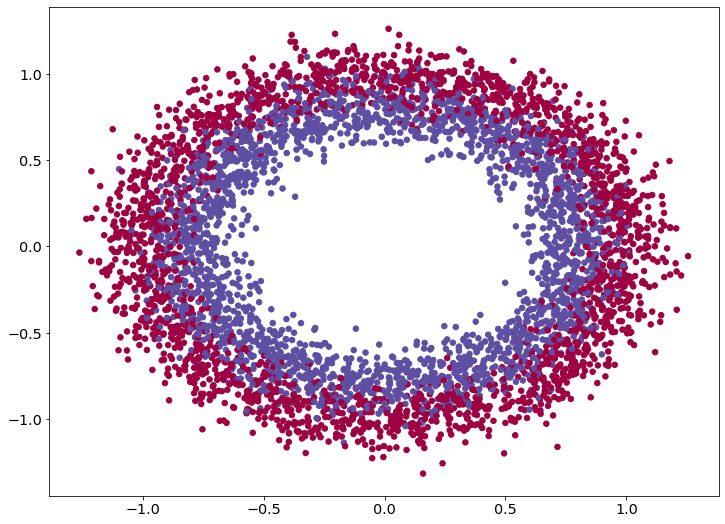

In [3]:
# Create make_circle dataset
X, y = make_circles(n_samples=NUM_SAMPLES, shuffle=True, noise=NOISE, random_state=RANDOM_STATE)

# Plot of the data
plt.scatter(X[:,0], X[:,1], s=30, c=y, cmap=plt.cm.Spectral);

# Split the data in training and test sets to measure performance of the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

### Question 1 (**10 Marks**)

Instantiate a Model with the **"Functional API"**, where you start from Input,  chain layer calls to specify the model's forward pass, and finally you create your model from inputs and outputs.

- The model shall have at least two hidden layers of an appropriate shape.
- Specify the activation function for hidden layers as well as output layer.


<div class="alert alert-block alert-warning">
    <p style="font-family: Arial; font-size:1.2em;color:red;">
        <strong>Note</strong>: use of Functional API is a must.</p>
</div>

In [4]:
#### START YOUR CODE
'''
Building the model with 3 hidden layers. For all the hidden layers relu activation is used. 

Weights are initialized using HeNormal initializer.

No activation is used in output layer because in loss function we specified from_logits=True.

'''

import tensorflow as tf

inputs = tf.keras.Input(shape=(2,))

x = tf.keras.layers.Dense(8, activation='relu',kernel_initializer='HeNormal')(inputs)

hidden= tf.keras.layers.Dense(16,activation='relu',kernel_initializer='HeNormal')(x)

hidden= tf.keras.layers.Dense(32,activation='relu',kernel_initializer='HeNormal')(hidden)

outputs = tf.keras.layers.Dense(2)(hidden)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

#### END YOUR CODE 

In [5]:
# Use following Loss function

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Question 2 (**10 Marks**)
Compile and fit your model. Collect output in `history` object.

In [6]:
#### START YOUR CODE
lr = 0.001 # learning rate

adam = tf.keras.optimizers.Adam(lr)

model.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])

history = model.fit(X_train, y_train , epochs = 20, verbose = 1)
#### END YOUR CODE

Epoch 1/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5197
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.6097
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7245
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7735
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.8220
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.8330
Epoch 7/20
125/125 [==============================] - 0s 4ms/step - loss: 0.3860 - accuracy: 0.8378
Epoch 8/20
125/125 [==============================] - 0s 4ms/step - loss: 0.3719 - accuracy: 0.8395
Epoch 9/20
125/125 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8390
Epoch 10/20
125/125 [==============================] - 0s 4ms/step - loss: 0.3622 - accuracy: 0.8410

### Question 3 (**10 Marks**)

Evaluate accuracy of the model. Accuracy is expected to be more than 0.8 on test set.

In [7]:
#### START YOUR CODE
'''
Test accuracy is greater than 0.80
'''
model.evaluate(X_test,y_test)
#### END YOUR CODE

32/32 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8270


[0.38955071568489075, 0.8270000219345093]

### Question 4 (**5 Marks**)
Plot **Loss** and **Accuracy** from history object.

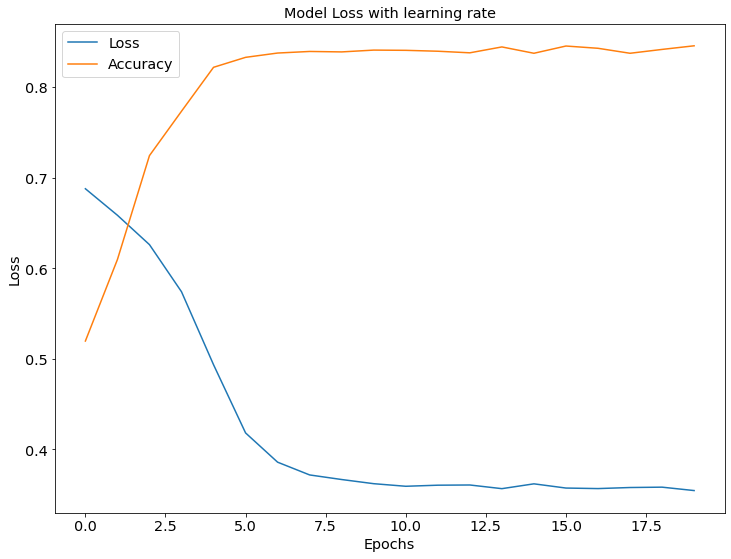

In [8]:
#### START YOUR CODE
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title("Model Loss with learning rate")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Accuracy'])
plt.show()
#### END YOUR CODE

### Question 5 (**5 Marks**)
Which activation function did you use in your solution and why?

In [9]:
'''
#### Write your answer here

I have used relu activation function for hidden layers. Because it restricts vanishing gradient problem.
As I have not used much deeper neural network in this solution, model won't be facing vanishing gradient problem.
Also relu computationally faster than tanh and sigmoid as it doesn't have exponential functions.
Relu also has a property of activating only those neurons whose output of linear transformation is more than 0. If linear
transformation output for that layer is less than 0 then those neurons are deactivated.

Note: I have also used tanh activation. Did not see much difference from ReLU.

For output layer I have not used any activation function while training the model because we are passing from_logits=True in 
loss function.

#### Answer to Question 5 ends here
'''

"\n#### Write your answer here\n\nI have used relu activation function for hidden layers. Because it restricts vanishing gradient problem.\nAs I have not used much deeper neural network in this solution, model won't be facing vanishing gradient problem.\nAlso relu computationally faster than tanh and sigmoid as it doesn't have exponential functions.\nRelu also has a property of activating only those neurons whose output of linear transformation is more than 0. If linear\ntransformation output for that layer is less than 0 then those neurons are deactivated.\n\nNote: I have also used tanh activation. Did not see much difference from ReLU.\n\nFor output layer I have not used any activation function while training the model because we are passing from_logits=True in \nloss function.\n\n#### Answer to Question 5 ends here\n"